# 매매가 먼저 불러오기

In [7]:
# 폰트 문제 해결하기
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [32]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [11]:
price = pd.read_excel("중위단위매매가격_아파트.xlsx",header=10,encoding="euc-kr")

In [13]:
price.head()

,지 역,구별,2015년 01월,2015년 02월,2015년 03월,2015년 04월,2015년 05월,2015년 06월,2015년 07월,2015년 08월,...,2017년 07월,2017년 08월,2017년 09월,2017년 10월,2017년 11월,2017년 12월,2018년 01월,2018년 02월,2018년 03월,2018년 04월
0,NaN,서울시,5829,5846,5883,5940,5978,6031,6285,6314,...,6773,6820,6809,6819,6845,7599,7740,7906,7946,7979
1,NaN,종로구,5841,5841,5847,5865,5906,5894,5908,5920,...,6395,6458,6472,6489,6542,7756,7908,8013,8024,8024
2,NaN,중구,5818,5836,5871,5901,5901,5954,6019,6030,...,6285,6312,6353,6371,6406,7964,8046,8064,8064,8064
3,NaN,용산구,7313,7317,7351,7386,7440,7449,7380,7380,...,8061,8089,8089,8089,8123,10552,10841,11169,11253,11329
4,NaN,성동구,5600,5600,5655,5710,5680,5714,5832,5906,...,6394,6438,6436,6445,6523,7847,8024,8246,8329,8295


In [17]:
price2=price.loc[:,["구별","2016년 12월"]]
price2.drop([0],inplace=True)

In [18]:
price2.head()

,구별,2016년 12월
1,종로구,6165
2,중구,6163
3,용산구,7773
4,성동구,6178
5,광진구,7050


# 서울시 학원 현황 2016년 기준

In [5]:
academy = pd.read_excel("서울시 학원 현황_2016.xls",header=1
                       ,encoding="utf-8")

In [6]:
academy.head()

,구별,입시검정 및 보습,국제화,예능,특수교육,종합,기타,소계
0,종로구,73.0,6.0,12.0,-,2.0,7.0,100.0
1,중구,47.0,5.0,9.0,-,2.0,2.0,65.0
2,용산구,69.0,27.0,31.0,-,3.0,1.0,131.0
3,성동구,149.0,15.0,61.0,-,11.0,9.0,245.0
4,광진구,244.0,30.0,77.0,-,7.0,17.0,375.0


In [21]:
academy.drop([25],inplace=True)
academy.drop([26],inplace=True)

In [22]:
academy.tail()

,구별,입시검정 및 보습,국제화,예능,특수교육,종합,기타,소계
20,관악구,227.0,17.0,104.0,-,10.0,11.0,369.0
21,서초구,534.0,79.0,137.0,-,26.0,49.0,825.0
22,강남구,977.0,206.0,239.0,-,53.0,114.0,1589.0
23,송파구,676.0,72.0,229.0,-,9.0,48.0,1034.0
24,강동구,438.0,30.0,163.0,-,11.0,41.0,683.0


In [25]:
academy=academy.loc[:,["구별","소계"]]

In [26]:
data_result = pd.merge(price2,academy,on="구별")

In [27]:
data_result

,구별,2016년 12월,소계
0,종로구,6165,100.0
1,중구,6163,65.0
2,용산구,7773,131.0
3,성동구,6178,245.0
4,광진구,7050,375.0
5,동대문구,5035,301.0
6,중랑구,4261,287.0
7,성북구,4936,421.0
8,강북구,4263,209.0
9,도봉구,4001,362.0


In [41]:
data_result.describe()

,2016년 12월,소계
count,25.000000,25.000000
mean,6149.320000,471.440000
std,2090.183718,350.545418
min,4001.000000,65.000000
25%,4665.000000,285.000000
50%,5755.000000,363.000000
75%,6817.000000,670.000000
max,12647.000000,1589.000000


In [28]:
# 회귀식

In [34]:
np.corrcoef(data_result["소계"],data_result["2016년 12월"]) # 상관계수 0.72

array([[1.        , 0.72074051],
       [0.72074051, 1.        ]])

In [35]:
fp1 = np.polyfit(data_result["소계"],data_result["2016년 12월"],1)

In [36]:
fp1 # 기울기 / y 절편

array([   4.29753178, 4123.29161879])

In [37]:
f1 = np.poly1d(fp1)

In [38]:
f1

poly1d([   4.29753178, 4123.29161879])

In [42]:
# 회귀선 x축 
x = np.linspace(50,1600,100)

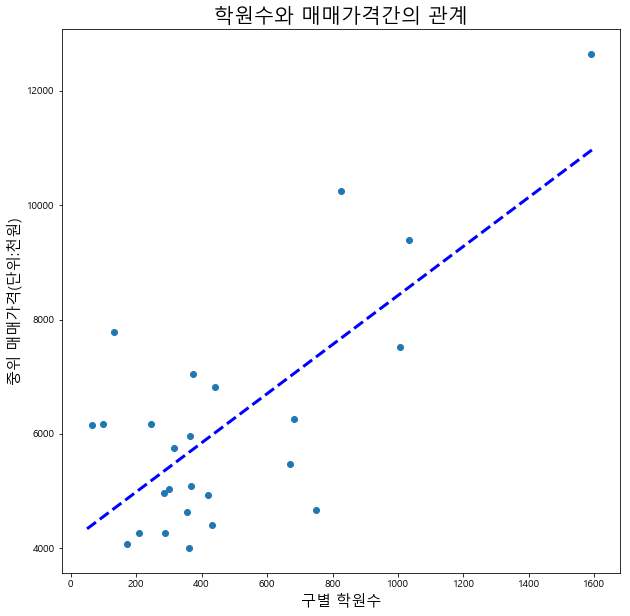

In [52]:
# 시각화 
plt.figure(figsize =(10,10))
plt.scatter(data_result["소계"],data_result["2016년 12월"])
plt.plot(x,f1(x),c="B",lw=3,ls="dashed")

plt.title("학원수와 매매가격간의 관계",size=20)
plt.xlabel("구별 학원수",size=15)
plt.ylabel("중위 매매가격(단위:천원)",size=15)
plt.show()

In [57]:
## 회귀선과 가장 멀리 떨어진 정도 ~ 오차 <오차가 작은순서 > 

data_result["오차"] = np.abs(data_result["2016년 12월"]-f1(data_result["소계"]))
sort_result = data_result.sort_values(by="오차",ascending=True)
data_result["오차 표준편차"] = np.sqrt(data_result["오차"])
sort_result ## 오차 표준편차가 작은 순서대로 나열

,구별,2016년 12월,소계,오차,오차 표준편차
18,영등포구,5755,316.0,273.688340,16.543529
19,동작구,5957,363.0,273.704346,16.544012
12,서대문구,4967,285.0,381.088175,19.521480
5,동대문구,5035,301.0,381.848684,19.540949
20,관악구,5096,369.0,613.080845,24.760469
8,강북구,4263,209.0,758.475760,27.540439
17,금천구,4075,172.0,787.467085,28.061844
13,마포구,6817,442.0,794.199336,28.181542
24,강동구,6257,683.0,801.505823,28.310878
23,송파구,9386,1034.0,819.060523,28.619233


## 요약 
- 회귀선: y(매매가) = 4.29753178 X(학원수) + 4123.29161879
- 상관계수: 0.72074051